# 1. Introduction

### 1.1 Background and Goal

In the highly competitive landscape of mobile applications, retaining users is crucial for sustaining growth and profitability. Our food short video app faces significant challenges with user churn, where users uninstall the app after a short period of engagement. Identifying and predicting which users are likely to churn allows us to proactively address the factors contributing to their disengagement. By implementing a predictive model for user churn, we can tailor our marketing strategies, enhance user experience, and ultimately improve retention rates.

This project aims to leverage data analytics and machine learning techniques to forecast churn and inform targeted interventions, ensuring the long-term success and competitiveness of our app.

### 1.2 Criteria for Defining Churn

- Inactivity Duration: The user has not logged into the app for a significant period (e.g., 30 days).
- Low Engagement: The user has minimal or no interactions with the app over a defined period (e.g., watched fewer than 5 videos, given fewer than 3 likes, or spent less than 10 minutes on the app in the past month).
- Combination of Factors: A combination of inactivity and low engagement metrics can be used to identify churn.

### 1.3 Data Overview

The dataset from Meetfood consists of 155,732 records with 31 features. The daraset includes information about:
1. UserID: A unique identifier for each user in the dataset.
2. Age: The age of the user.
3. Gender: The gender of the user, which can be 'Male' or 'Female'.
4. Country: The country where the user is located, selected from 'US', 'Canada', 'UK', 'Australia', or 'India'.
5. DeviceType: The type of device used by the user, such as 'Mobile', 'Tablet', or 'Desktop'.
6. OS: The operating system of the user's device, which can be 'iOS', 'Android', or 'Other'.
7. AppVersion: The version of the app that the user is using, chosen from '1.0', '1.1', '1.2', or '2.0'.
8. ReferralSource: How the user found the app, including options like 'Organic', 'Social Media', or 'Advertisement'.
9. RegistrationDate: The date when the user registered on the app.
10. LastLoginDate: The date of the user's last login to the app.
11. VideosWatched: The number of videos the user has watched.
12. LikesGiven: The number of likes the user has given to videos.
13. CommentsMade: The number of comments the user has made on videos.
14. TimeSpent: The total time spent by the user on the app, measured in minutes.
15. SubscriptionStatus: Whether the user has a subscription, which can be 'Yes' or 'No'.
16. AccountType: The type of account the user has, which can be 'Free' or 'Premium'.
17. NotificationsEnabled: Whether the user has enabled push notifications, which can be 'Yes' or 'No'.
18. AverageSessionDuration: The average duration of each session the user spends on the app, measured in minutes. ( a "session" refers to a period during which a user actively engages with the app. This typically starts when a user opens the app and ends when the app is closed or when there is a prolonged period of inactivity.)
19. TotalSessions: The total number of sessions the user has logged on the app.
20. ProfileCompleteness: The percentage of the user's profile that has been completed.
21. FavoriteCategory: The category of videos that the user watches most frequently, such as 'Recipes', 'Cooking Techniques', or 'Meal Types'.
22. LastVideoWatched: The date when the user last watched a video.
23. EngagementScore: A composite score representing the user's overall engagement with the app, ranging from 0 to 1.
24. VideoUploads: The number of videos uploaded by the user.
25. VideoShares: The number of videos shared by the user.
26. LoginFrequency: The average number of times the user logs into the app per week.
27. AdInteractions: The number of times the user has interacted with advertisements on the app.
28. InAppPurchases: The total amount of money the user has spent on in-app purchases, measured in dollars.
29. SupportTickets: The number of support tickets submitted by the user. (This could include reporting bugs, seeking help with account problems, requesting feature assistance, or any other inquiries requiring support from the app’s customer service team.)
30. UserRating: The average rating given by the user to the videos watched, ranging from 1 to 5.
31. Churn: Whether the user has churned (yes/no)

# 2. Formatting Notebook Environment and Importing Dataset

In [1]:
# Data manipulation and basic machine learning libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data visualization libraries
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

# Sagemaker and other AWS libraries
#Sagemaker and other AWS libraries
import sagemaker
import sagemaker.amazon.common as smac
import boto3
import io
from io import StringIO
from sagemaker import get_execution_role
import os

import warnings
warnings.filterwarnings('ignore')

#Defining some variables for Sagemaker session
region = boto3.Session().region_name
smclient = boto3.Session().client('sagemaker')
role = get_execution_role()
region, smclient, role

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


('us-east-1',
 'arn:aws:iam::339712697475:role/SageMakerExecutionRole')

In [2]:
# 500 rows and 200 columns will be presented
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [3]:
# define a function to read in our dataset
def CSV_Reader(bucket, subfolder, source_file_name):
    '''
    The CSV_Reader() function takes in the names of the bucket, subfolder, and source file name, and desired dataframe name.
    It first constructs the filepath, and then imports the file residing at this filepath, based on the title fed to the function.
    
    Arguments
    --------
    bucket: Head S3 repository bucket
    subfolder: Subfolder containing the source data
    source_file_name: Name of source CSV data file
    
    Return
    --------
    Returns the source data in a pandas dataframe
    '''
    data_location = 's3://{}/{}/{}'.format(bucket, subfolder, source_file_name)
    dataset = pd.read_csv(data_location, low_memory=False)
    return dataset

In [4]:
bucket = 'user-churn'
subfolder = 'input'
source_file_name = 'user_churn_data.csv'
processed_data_folder = 'user-churn-processed-data'

In [5]:
# read data from S3
df = CSV_Reader(bucket, subfolder, source_file_name)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155732 entries, 0 to 155731
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UserID                  155732 non-null  int64  
 1   Age                     148077 non-null  float64
 2   Gender                  150977 non-null  object 
 3   Country                 152600 non-null  object 
 4   DeviceType              155732 non-null  object 
 5   OS                      155732 non-null  object 
 6   AppVersion              155732 non-null  float64
 7   ReferralSource          147940 non-null  object 
 8   RegistrationDate        155732 non-null  object 
 9   LastLoginDate           155732 non-null  object 
 10  VideosWatched           155732 non-null  int64  
 11  LikesGiven              155732 non-null  int64  
 12  CommentsMade            155732 non-null  int64  
 13  TimeSpent               155732 non-null  int64  
 14  SubscriptionStatus  

# 3. Exploratory Data Analysis

### 3.1 Data Imbalance Check

In [6]:
df.head()

,UserID,Age,Gender,Country,DeviceType,OS,AppVersion,ReferralSource,RegistrationDate,LastLoginDate,VideosWatched,LikesGiven,CommentsMade,TimeSpent,SubscriptionStatus,AccountType,NotificationsEnabled,AverageSessionDuration,TotalSessions,ProfileCompleteness,FavoriteCategory,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,UserRating,EngagementScore,Churn
0,1,31.0,Male,US,Mobile,iOS,1.2,Organic,2022-03-23,2023-01-11,31,28,6,9,Yes,Free,Yes,34,126,95,Recipes,2022-12-31,3,4,7,2,63,0,NaN,0.080554,Yes
1,2,27.0,Female,NaN,Mobile,iOS,1.2,Social Media,2022-03-25,2022-09-10,32,18,6,131,Yes,Free,No,0,161,94,Recipes,2022-09-25,1,4,7,6,10,1,2.585711,0.080870,Yes
2,3,32.0,Female,Canada,Mobile,iOS,1.2,Social Media,2022-03-03,2022-03-25,20,22,11,196,No,Free,Yes,20,103,81,Recipes,2022-08-19,0,4,10,5,34,0,NaN,0.081385,Yes
3,4,38.0,Female,US,Mobile,iOS,1.1,Organic,2022-03-12,2022-12-18,20,21,4,56,No,Free,No,0,60,78,Recipes,2022-04-19,1,2,6,1,8,0,NaN,0.048851,Yes
4,5,26.0,Female,Canada,Mobile,iOS,1.2,Organic,2022-03-18,2022-04-14,12,9,4,28,No,Free,No,5,56,73,Cooking Techniques,2022-06-21,3,2,4,2,8,3,1.046676,0.032905,Yes


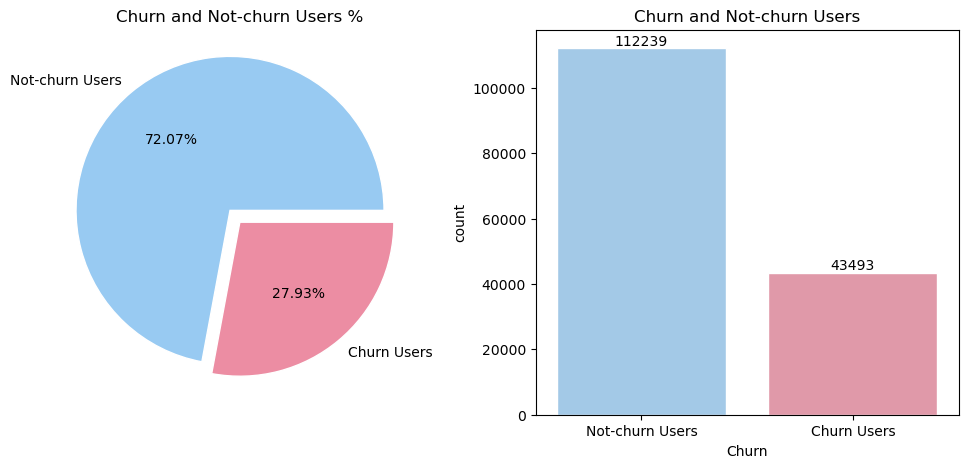

In [7]:
# Define the colors for the plots
palette = ['#98CAF2', '#EC8DA3', '#cadefc', '#f2c9f0', '#decffa', '#f5d3e6']

l1 = list(df['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(pie_values, labels=['Not-churn Users', 'Churn Users'],
        autopct='%1.2f%%',
        explode=(0.1, 0), colors=palette,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'antialiased': True})
plt.title('Churn and Not-churn Users %')

plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='Churn', palette=palette, edgecolor='white')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(['Not-churn Users', 'Churn Users'])

plt.title('Churn and Not-churn Users')
plt.show()

**Key Findings**

- The dataset is imbalanced with an almost 1:3 ratio of churn users. This imbalance is notable and needs to be addressed for accurate model performance.
- This means that a blind guess would give us an accuracy of about 72.07%.
- We should consider resampling or SMOTE techniques.

### 3.2 Distribution and Skewness

In [8]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns = numerical_columns[1::]
columns = df.columns
categorical_columns = [col for col in columns if col not in numerical_columns]

In [9]:
numerical_columns = ['Age',
 'VideosWatched',
 'LikesGiven',
 'CommentsMade',
 'TimeSpent',
 'AverageSessionDuration',
 'TotalSessions',
 'ProfileCompleteness',
 'VideoUploads',
 'VideoShares',
 'LoginFrequency',
 'AdInteractions',
 'InAppPurchases',
 'SupportTickets',
 'EngagementScore']

categorical_columns = ['Gender', 
'AppVersion', 
'UserRating',
 'Country',
 'DeviceType',
 'OS',
 'ReferralSource',
 'RegistrationDate',
 'LastLoginDate',
 'SubscriptionStatus',
 'AccountType',
 'NotificationsEnabled',
 'FavoriteCategory',
 'LastVideoWatched']

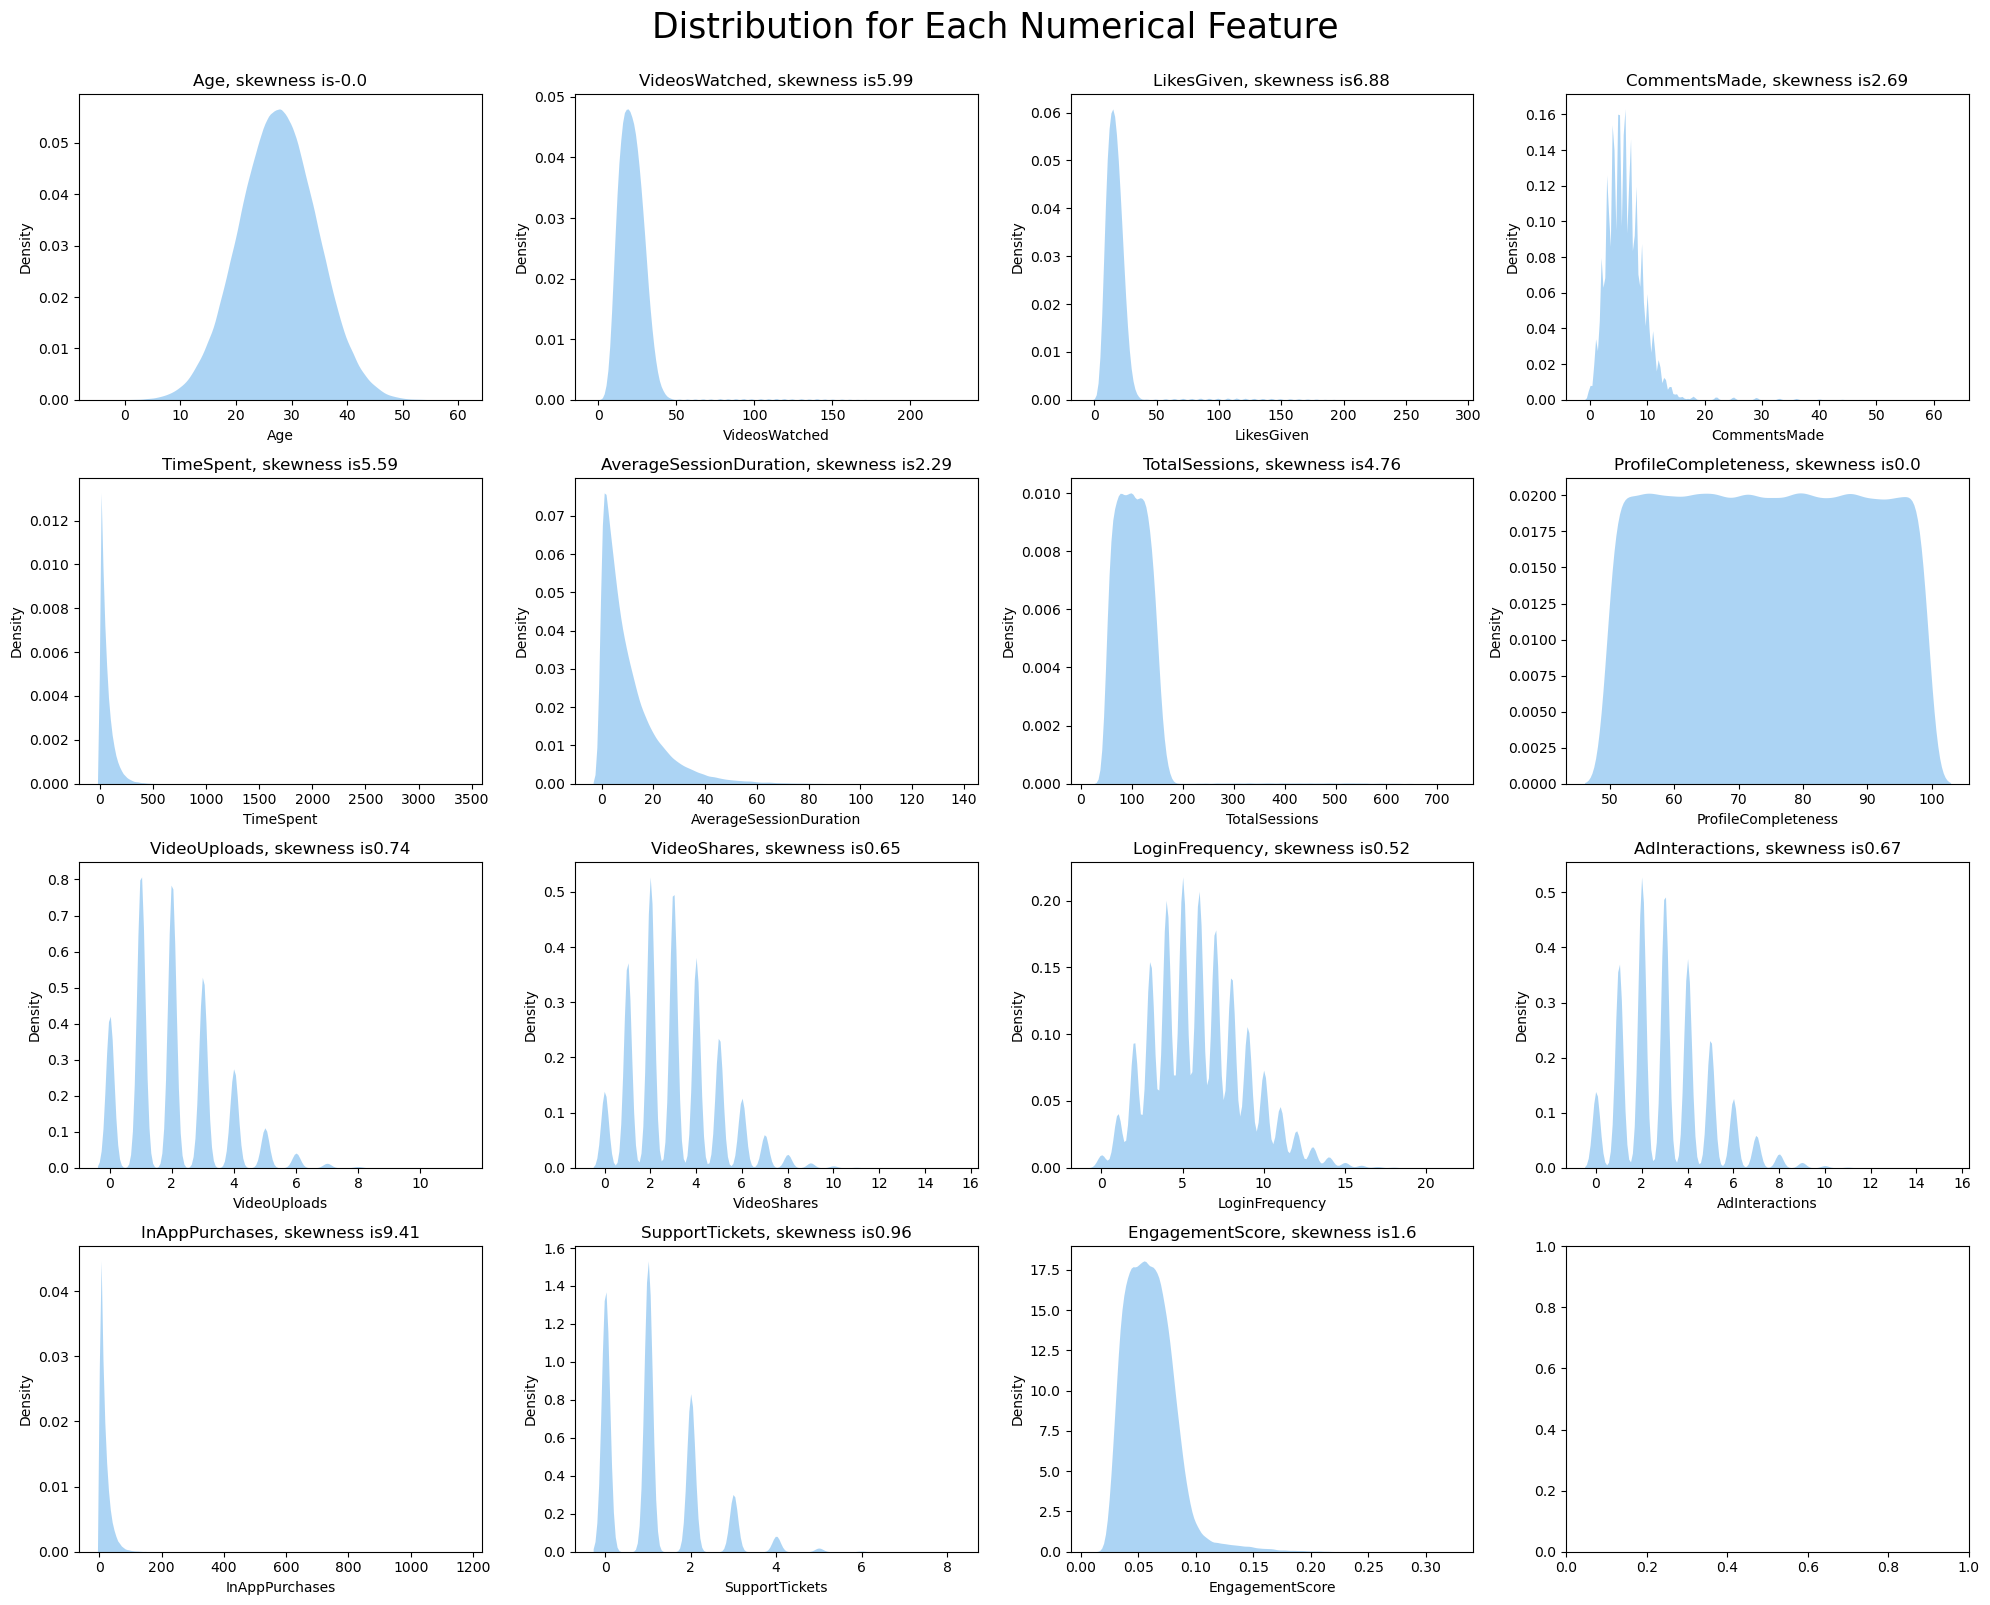

In [10]:
# checking for distribution
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#98CAF2')
        axs[i].set_title(data + ', skewness is' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

dist_custom(dataset=df, columns_list=numerical_columns, rows=4, cols=4, suptitle='Distribution for Each Numerical Feature')
plt.tight_layout()

**Key Findings**

- Many features are right-skewed, indicating that while most users have lower values for these features, there are significant outliers with much higher values.
- The high skewness in many features may require transformations (e.g., log transformation) to normalize the data for better model performance.
- The presence of outliers and high skewness in engagement-related features suggests that personalized and targeted strategies might be effective in improving user retention and activity levels.

### 3.3 Checking for outliers - Inter Quartile Range (IQR)

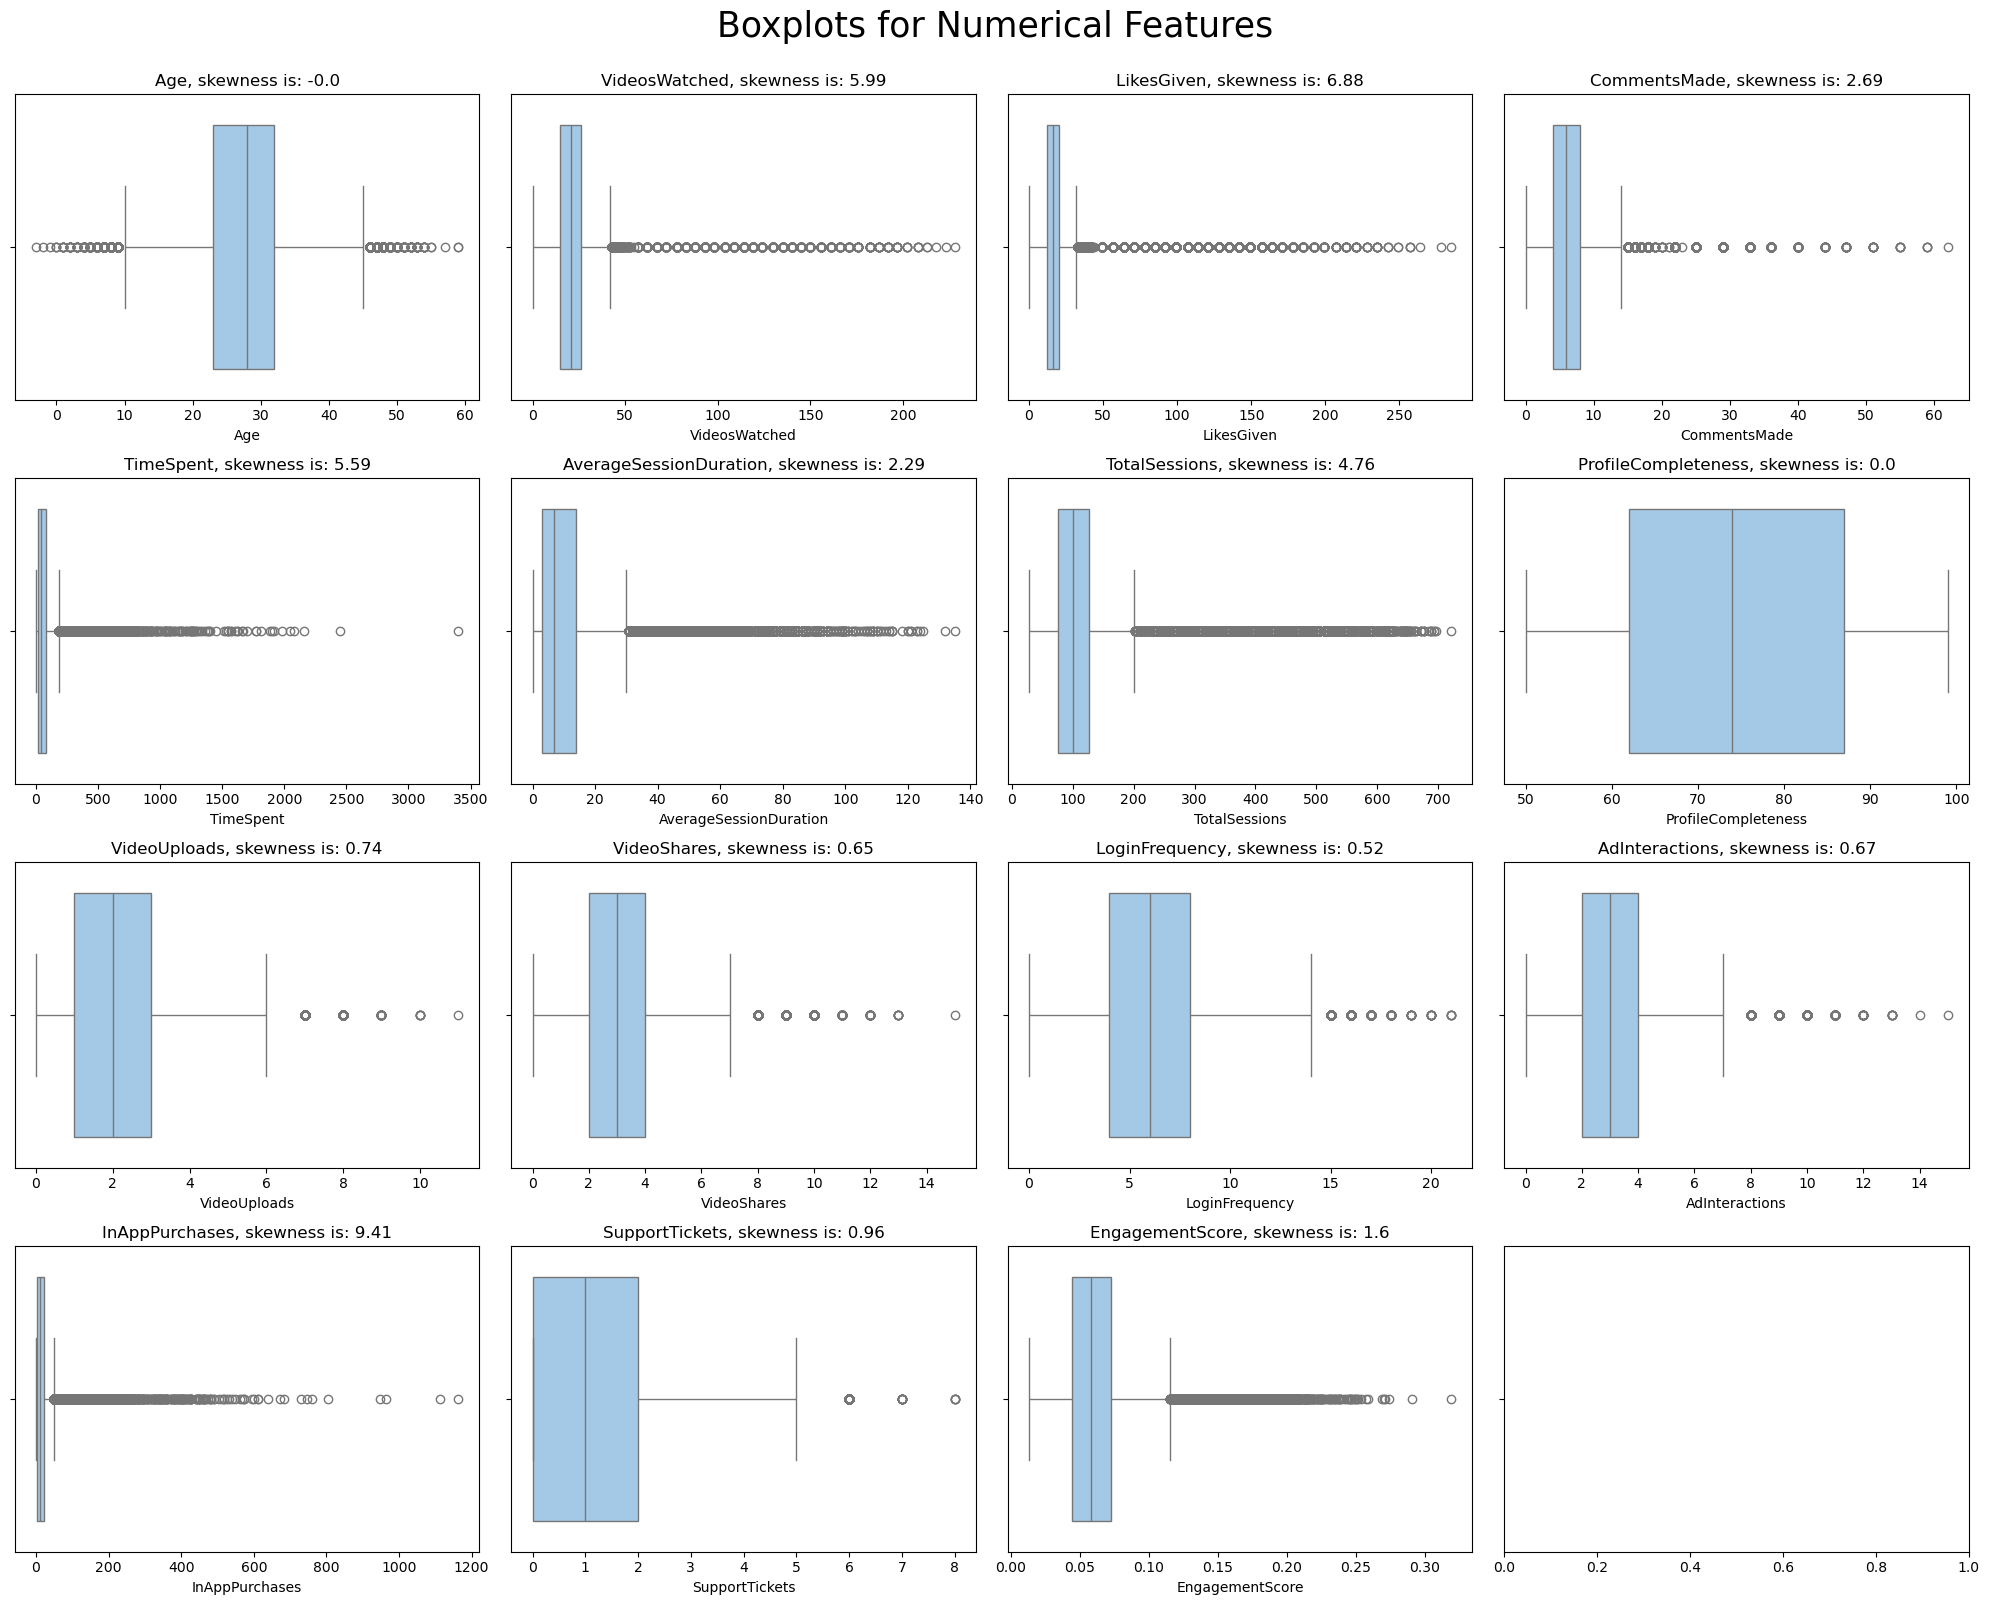

In [11]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette=palette, linewidth=1)
        axs[i].set_title(data + ', skewness is: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

boxplots_custom(dataset=df, columns_list=numerical_columns, rows=4, cols=4, suptitle='Boxplots for Numerical Features')
plt.tight_layout()

**Key Findings**
- **Addressing Skewed Distributions**: Apply transformations (e.g., log, square root) to highly skewed features like VideosWatched, LikesGiven, TimeSpent, and InAppPurchases to normalize the data distribution and improve model performance.
- **Handling Outliers**: we need to consider both analytics and context. Ultimately, the decision to keep or remove outliers would depend on their impact on the model's performance and the business outcome.

### 3.4 Categorical Featrue Distribution

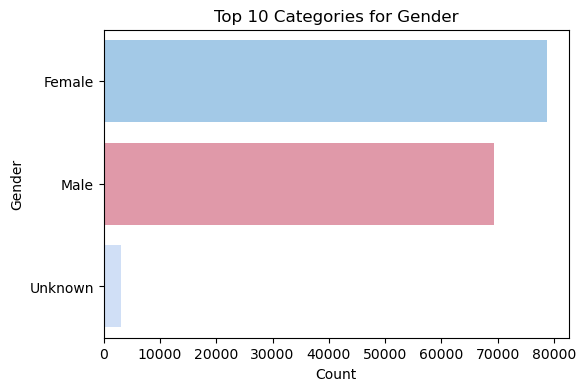

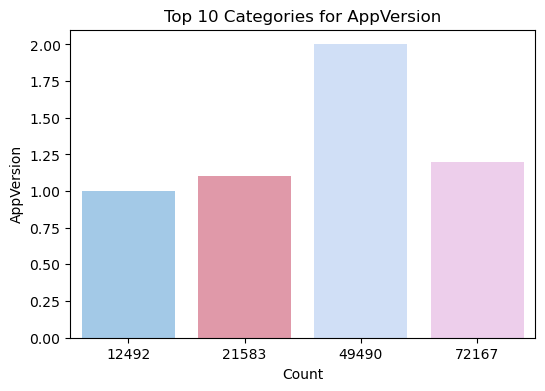

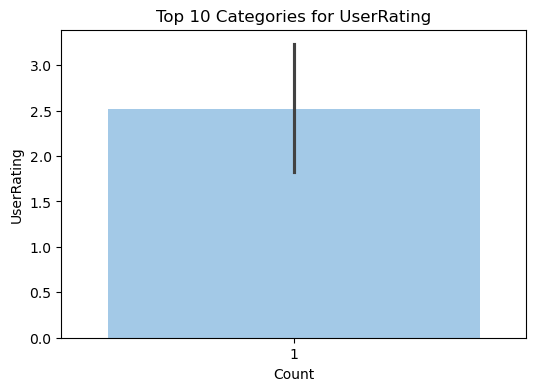

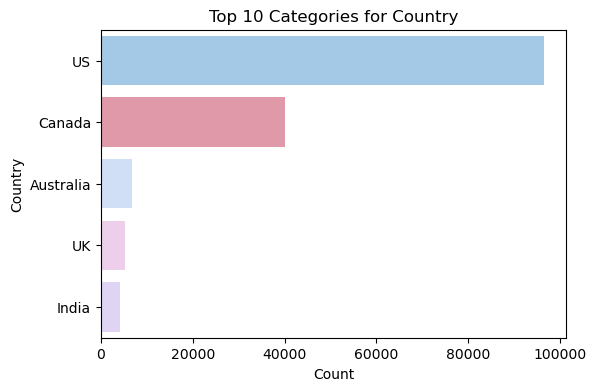

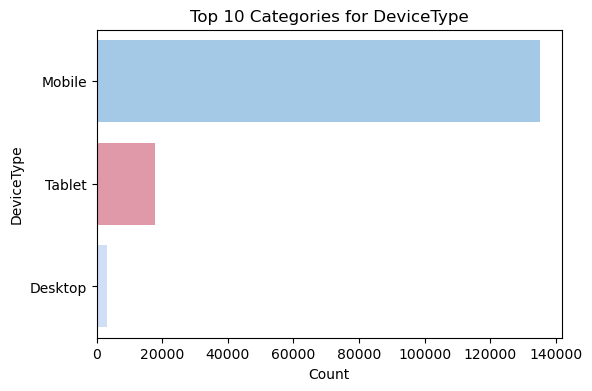

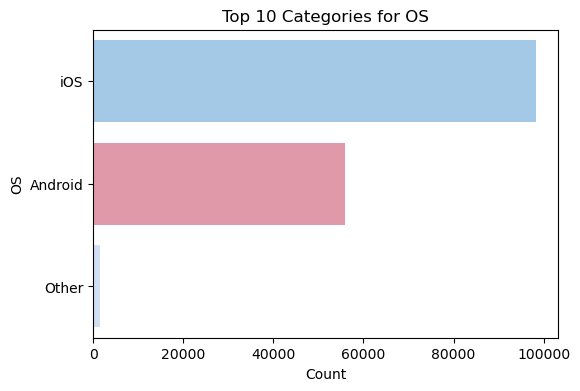

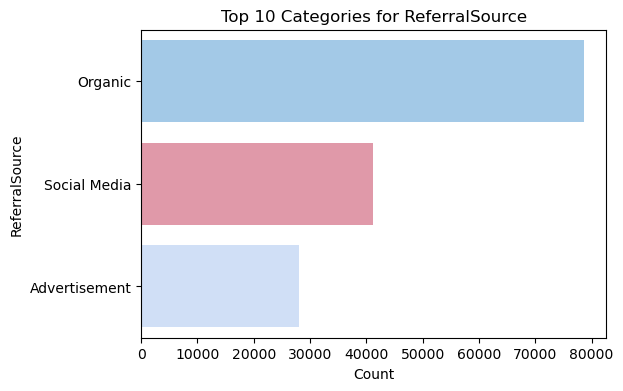

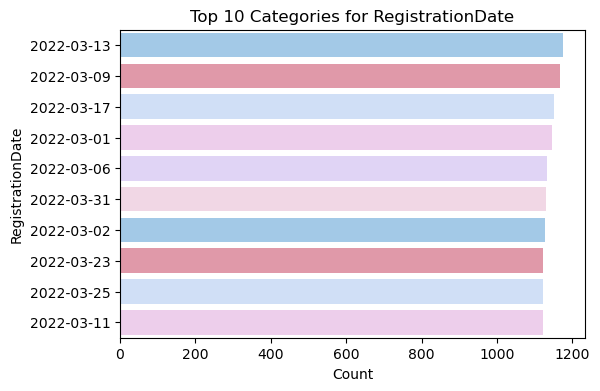

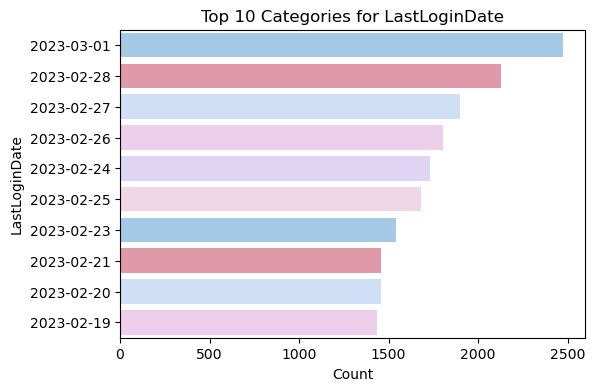

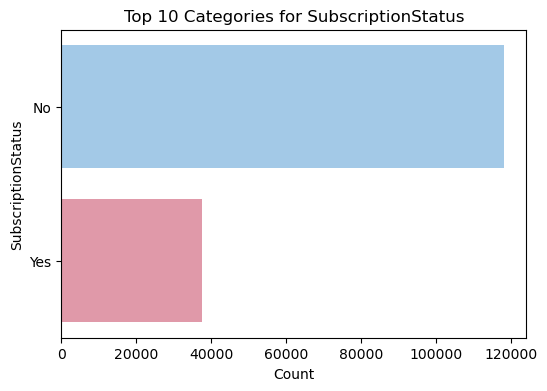

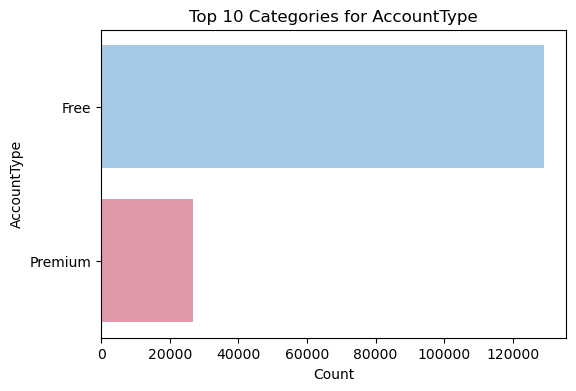

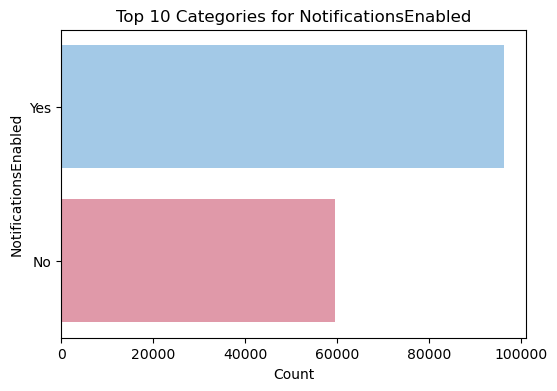

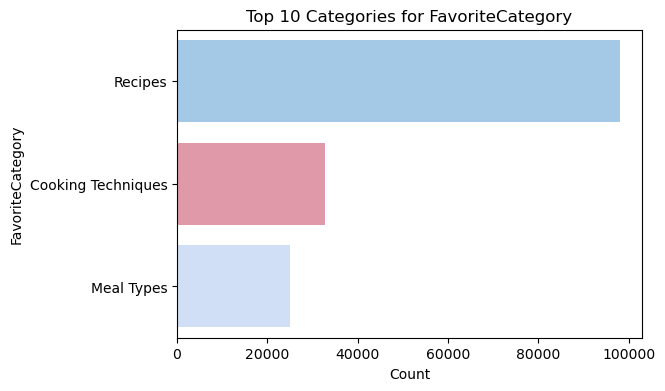

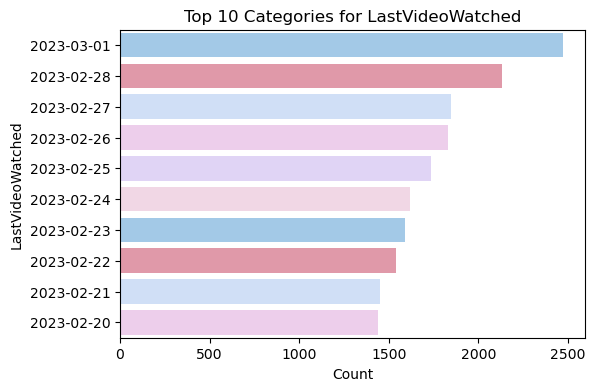

In [12]:
def plot_top_categories(df, column):
    category_counts = df[column].value_counts().head(10)
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=category_counts, y=category_counts.index, palette=palette)
    plt.title(f'Top 10 Categories for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()
    
for column in categorical_columns:
    plot_top_categories(df, column)

### 3.5 Missing Data

In [13]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
missing_data.head()

,Missing Values,Percentage
UserRating,97933,62.885598
ReferralSource,7792,5.003467
Age,7655,4.915496
Gender,4755,3.053322
Country,3132,2.011147


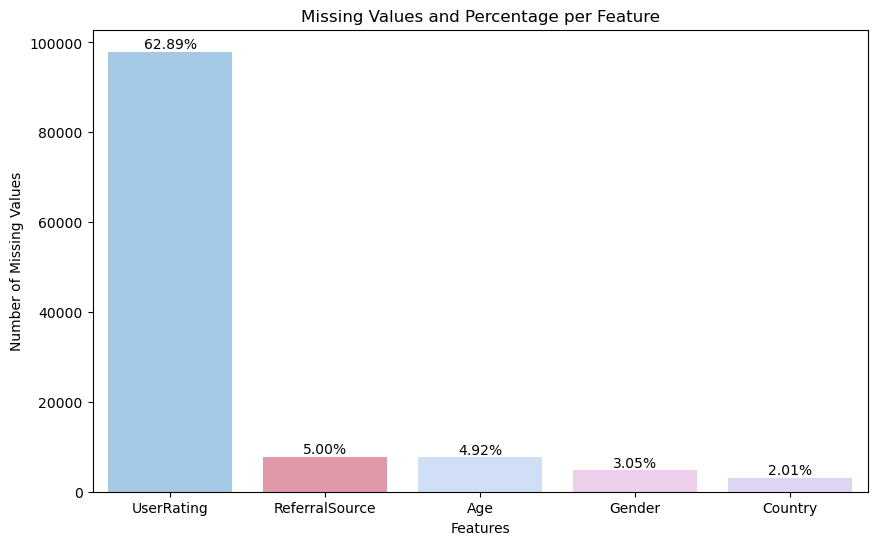

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.index, y=missing_data['Missing Values'], palette=palette)
plt.title('Missing Values and Percentage per Feature')
plt.ylabel('Number of Missing Values')
plt.xlabel('Features')

for i in range(missing_data.shape[0]):
    plt.text(i, missing_data['Missing Values'][i], f"{missing_data['Percentage'][i]:.2f}%", ha='center', va='bottom')
    
plt.show()

# 4. Feature Engineering

### 4.1 Feature Selection (Initial phase)


Feature selection is the process of identifying and selecting the most relevant features from your dataset that contribute the most to the predictive power of your model. In this project, feature selection helps improve model accuracy, reduce overfitting, and decrease training time by focusing only on the most important variables that influence user churn and retention.

In [15]:
df.columns

Index(['UserID', 'Age', 'Gender', 'Country', 'DeviceType', 'OS', 'AppVersion',
       'ReferralSource', 'RegistrationDate', 'LastLoginDate', 'VideosWatched',
       'LikesGiven', 'CommentsMade', 'TimeSpent', 'SubscriptionStatus',
       'AccountType', 'NotificationsEnabled', 'AverageSessionDuration',
       'TotalSessions', 'ProfileCompleteness', 'FavoriteCategory',
       'LastVideoWatched', 'VideoUploads', 'VideoShares', 'LoginFrequency',
       'AdInteractions', 'InAppPurchases', 'SupportTickets', 'UserRating',
       'EngagementScore', 'Churn'],
      dtype='object')

In [16]:
# Drop the irrelevant features and features with too many missing values
df = df.drop(['UserID', 'UserRating'], axis=1)
df.columns

Index(['Age', 'Gender', 'Country', 'DeviceType', 'OS', 'AppVersion',
       'ReferralSource', 'RegistrationDate', 'LastLoginDate', 'VideosWatched',
       'LikesGiven', 'CommentsMade', 'TimeSpent', 'SubscriptionStatus',
       'AccountType', 'NotificationsEnabled', 'AverageSessionDuration',
       'TotalSessions', 'ProfileCompleteness', 'FavoriteCategory',
       'LastVideoWatched', 'VideoUploads', 'VideoShares', 'LoginFrequency',
       'AdInteractions', 'InAppPurchases', 'SupportTickets', 'EngagementScore',
       'Churn'],
      dtype='object')

### 4.2 Feature Transformation

#### 4.2.1 Handling Missing Values

I will use median imputation for 'Age', use mode imputation for 'ReferralSource', 'Gender', and 'Country'.

In [17]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

mode_referral_source = df['ReferralSource'].mode()[0]
df['ReferralSource'] = df['ReferralSource'].fillna(mode_referral_source)

mode_Gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_Gender)

mode_Country = df['Country'].mode()[0]
df['Country'] = df['Country'].fillna(mode_Country)

missing_values = df.isnull().sum()
missing_values

Age                       0
Gender                    0
Country                   0
DeviceType                0
OS                        0
AppVersion                0
ReferralSource            0
RegistrationDate          0
LastLoginDate             0
VideosWatched             0
LikesGiven                0
CommentsMade              0
TimeSpent                 0
SubscriptionStatus        0
AccountType               0
NotificationsEnabled      0
AverageSessionDuration    0
TotalSessions             0
ProfileCompleteness       0
FavoriteCategory          0
LastVideoWatched          0
VideoUploads              0
VideoShares               0
LoginFrequency            0
AdInteractions            0
InAppPurchases            0
SupportTickets            0
EngagementScore           0
Churn                     0
dtype: int64

#### 4.2.2 Discretization (Bucketing/Binned)

It is the process of converting a continuous feature into a categorical feature. This allows the model to focus on learning only a few categories instead of attempting to learn an infinite number of possibilities.

In [18]:
# Age is divided into decades of life.
bins = [-float('inf'), 0, 17, 24, 34, 44, 60, float('inf')] # Include negative and very large values as outliers
labels = ['Outliers', 'Children/Teens', 'Young Adults', 'Adults', 'Mid-Age Adults', 'Older Adults', 'Outliers2']
df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Age_binned'].value_counts()

Age_binned
Adults            84618
Young Adults      33474
Mid-Age Adults    27467
Children/Teens     8500
Older Adults       1670
Outliers              3
Outliers2             0
Name: count, dtype: int64

#### 4.2.3 Feature Scaling

Featrue Scaling refers to the process of scaling feature to have a standard range and distribution. Based on EDA, we need to have the following operations:
- Standardization (Z-score normalization). It is the process of changing the distribution of a feature to have 0 mean and a standard deviation of 1.
- Log scaling. It can be used to mitigate the skewness of a feature.

In [19]:
numerical_columns = ['VideosWatched', 'LikesGiven', 'CommentsMade', 'TimeSpent', 
                     'AverageSessionDuration', 'TotalSessions', 'ProfileCompleteness', 
                     'VideoUploads', 'VideoShares', 'LoginFrequency', 'AdInteractions', 
                     'InAppPurchases', 'SupportTickets', 'EngagementScore']

# Step 1: Apply Log Transformation (Add 1 to avoid log(0) issue)
df_log = df[numerical_columns].map(lambda x: np.log(x + 1)) 
df_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Apply Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_log), columns=numerical_columns)

df[numerical_columns] = df_standardized

df.head()

,Age,Gender,Country,DeviceType,OS,AppVersion,ReferralSource,RegistrationDate,LastLoginDate,VideosWatched,LikesGiven,CommentsMade,TimeSpent,SubscriptionStatus,AccountType,NotificationsEnabled,AverageSessionDuration,TotalSessions,ProfileCompleteness,FavoriteCategory,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,EngagementScore,Churn,Age_binned
0,31.0,Male,US,Mobile,iOS,1.2,Organic,2022-03-23,2023-01-11,1.066103,1.219091,0.173603,-1.016660,Yes,Free,Yes,1.529910,0.727589,1.320108,Recipes,2022-12-31,0.794296,0.669560,0.499005,-0.337395,1.662695,-1.247519,0.903464,Yes,Adults
1,27.0,Female,US,Mobile,iOS,1.2,Social Media,2022-03-25,2022-09-10,1.144122,0.302649,0.173603,1.078480,Yes,Free,No,-1.898308,1.423777,1.266795,Recipes,2022-09-25,-0.539686,0.669560,0.499005,1.331976,0.077777,0.149123,0.917334,Yes,Adults
2,32.0,Female,Canada,Mobile,iOS,1.2,Social Media,2022-03-03,2022-03-25,-0.001846,0.716716,1.323792,1.403607,No,Free,Yes,1.037350,0.156141,0.517565,Recipes,2022-08-19,-1.873668,0.669560,1.201885,1.028264,1.119503,-1.247519,0.940004,Yes,Adults
3,38.0,Female,US,Mobile,iOS,1.1,Organic,2022-03-12,2022-12-18,-0.001846,0.620377,-0.544410,0.396601,No,Free,No,-1.898308,-1.369800,0.327804,Recipes,2022-04-19,-0.539686,-0.338641,0.204280,-1.136255,-0.102830,-1.247519,-0.512423,Yes,Mid-Age Adults
4,26.0,Female,Canada,Mobile,iOS,1.2,Organic,2022-03-18,2022-04-14,-1.217760,-1.088416,-0.544410,-0.152113,No,Free,No,-0.170617,-1.563783,-0.005082,Cooking Techniques,2022-06-21,0.794296,-0.338641,-0.538370,-0.337395,-0.102830,1.545765,-1.240809,Yes,Adults


#### 4.2.4 Encoding Categorical Features

In [20]:
categorical_columns = ['Age_binned', 'Gender', 
'AppVersion', 
 'Country',
 'DeviceType',
 'OS',
 'ReferralSource',
 'RegistrationDate',
 'LastLoginDate',
 'SubscriptionStatus',
 'AccountType',
 'NotificationsEnabled',
 'FavoriteCategory',
 'LastVideoWatched']

In [21]:
# Churn (outcome column)
df['Churn'] = df['Churn'].str.strip().str.title()
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Gender,Country,DeviceType,OS,AppVersion,ReferralSource,RegistrationDate,LastLoginDate,VideosWatched,LikesGiven,CommentsMade,TimeSpent,SubscriptionStatus,AccountType,NotificationsEnabled,AverageSessionDuration,TotalSessions,ProfileCompleteness,FavoriteCategory,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,EngagementScore,Churn,Age_binned,Churn_num
0,31.0,Male,US,Mobile,iOS,1.2,Organic,2022-03-23,2023-01-11,1.066103,1.219091,0.173603,-1.016660,Yes,Free,Yes,1.529910,0.727589,1.320108,Recipes,2022-12-31,0.794296,0.669560,0.499005,-0.337395,1.662695,-1.247519,0.903464,Yes,Adults,1
1,27.0,Female,US,Mobile,iOS,1.2,Social Media,2022-03-25,2022-09-10,1.144122,0.302649,0.173603,1.078480,Yes,Free,No,-1.898308,1.423777,1.266795,Recipes,2022-09-25,-0.539686,0.669560,0.499005,1.331976,0.077777,0.149123,0.917334,Yes,Adults,1
2,32.0,Female,Canada,Mobile,iOS,1.2,Social Media,2022-03-03,2022-03-25,-0.001846,0.716716,1.323792,1.403607,No,Free,Yes,1.037350,0.156141,0.517565,Recipes,2022-08-19,-1.873668,0.669560,1.201885,1.028264,1.119503,-1.247519,0.940004,Yes,Adults,1
3,38.0,Female,US,Mobile,iOS,1.1,Organic,2022-03-12,2022-12-18,-0.001846,0.620377,-0.544410,0.396601,No,Free,No,-1.898308,-1.369800,0.327804,Recipes,2022-04-19,-0.539686,-0.338641,0.204280,-1.136255,-0.102830,-1.247519,-0.512423,Yes,Mid-Age Adults,1
4,26.0,Female,Canada,Mobile,iOS,1.2,Organic,2022-03-18,2022-04-14,-1.217760,-1.088416,-0.544410,-0.152113,No,Free,No,-0.170617,-1.563783,-0.005082,Cooking Techniques,2022-06-21,0.794296,-0.338641,-0.538370,-0.337395,-0.102830,1.545765,-1.240809,Yes,Adults,1


##### 4.2.4.1 Label Encoding

Age_binned, SubscriptionStatus, AccountType, NotificationsEnabled

- Ordinal Data: When your categorical data has a natural order (e.g., low, medium, high), Label Encoder will assign increasing integers based on this order.
- Binary Variables: If you have a binary categorical variable (e.g., yes/no, true/false), Label Encoder is a good choice to convert these into 0s and 1s.
- Small Number of Categories: When your categorical variable has a limited number of unique categories, Label Encoder can be effective since it converts each unique category into a numerical value.

In [22]:
label_encoder = LabelEncoder()

df['Age_binned_encoded'] = label_encoder.fit_transform(df['Age_binned'])
df['SubscriptionStatus_encoded'] = label_encoder.fit_transform(df['SubscriptionStatus'])
df['AccountType_encoded'] = label_encoder.fit_transform(df['AccountType'])
df['NotificationsEnabled_encoded'] = label_encoder.fit_transform(df['NotificationsEnabled'])

df.head()

,Age,Gender,Country,DeviceType,OS,AppVersion,ReferralSource,RegistrationDate,LastLoginDate,VideosWatched,LikesGiven,CommentsMade,TimeSpent,SubscriptionStatus,AccountType,NotificationsEnabled,AverageSessionDuration,TotalSessions,ProfileCompleteness,FavoriteCategory,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,EngagementScore,Churn,Age_binned,Churn_num,Age_binned_encoded,SubscriptionStatus_encoded,AccountType_encoded,NotificationsEnabled_encoded
0,31.0,Male,US,Mobile,iOS,1.2,Organic,2022-03-23,2023-01-11,1.066103,1.219091,0.173603,-1.016660,Yes,Free,Yes,1.529910,0.727589,1.320108,Recipes,2022-12-31,0.794296,0.669560,0.499005,-0.337395,1.662695,-1.247519,0.903464,Yes,Adults,1,0,1,0,1
1,27.0,Female,US,Mobile,iOS,1.2,Social Media,2022-03-25,2022-09-10,1.144122,0.302649,0.173603,1.078480,Yes,Free,No,-1.898308,1.423777,1.266795,Recipes,2022-09-25,-0.539686,0.669560,0.499005,1.331976,0.077777,0.149123,0.917334,Yes,Adults,1,0,1,0,0
2,32.0,Female,Canada,Mobile,iOS,1.2,Social Media,2022-03-03,2022-03-25,-0.001846,0.716716,1.323792,1.403607,No,Free,Yes,1.037350,0.156141,0.517565,Recipes,2022-08-19,-1.873668,0.669560,1.201885,1.028264,1.119503,-1.247519,0.940004,Yes,Adults,1,0,0,0,1
3,38.0,Female,US,Mobile,iOS,1.1,Organic,2022-03-12,2022-12-18,-0.001846,0.620377,-0.544410,0.396601,No,Free,No,-1.898308,-1.369800,0.327804,Recipes,2022-04-19,-0.539686,-0.338641,0.204280,-1.136255,-0.102830,-1.247519,-0.512423,Yes,Mid-Age Adults,1,2,0,0,0
4,26.0,Female,Canada,Mobile,iOS,1.2,Organic,2022-03-18,2022-04-14,-1.217760,-1.088416,-0.544410,-0.152113,No,Free,No,-0.170617,-1.563783,-0.005082,Cooking Techniques,2022-06-21,0.794296,-0.338641,-0.538370,-0.337395,-0.102830,1.545765,-1.240809,Yes,Adults,1,0,0,0,0


##### 4.2.4.2 One-Hot Encoding

'Gender', 'AppVersion', 'Country', 'DeviceType', 'OS', 'ReferralSource', 'FavoriteCategory'

- Nominal Data: When your categorical variables represent distinct categories with no natural order (e.g., colors, countries, product types), One-Hot Encoding ensures that the model treats them as separate, independent categories.
- Multiple Categories: If your categorical variable has multiple unique categories (e.g., "red," "blue," "green," etc.), One-Hot Encoding will create a new binary column for each category. Each row will have a 1 in the column corresponding to the category it belongs to and 0 in all other columns.
- Avoiding Ordinal Relationships: When you want to avoid implying any ordinal relationship between categories, One-Hot Encoding is a better choice than Label Encoding, which could mistakenly introduce such a relationship.
- Feature Importance: One-Hot Encoding can also help preserve the feature importance of each category, especially in tree-based models (e.g., decision trees, random forests) that can benefit from the separation of categories.

In [23]:
one_hot_encoder_df = pd.get_dummies(df, columns=['Gender', 'AppVersion', 'Country', 'DeviceType', 'OS', 'ReferralSource', 'FavoriteCategory'], drop_first=True)

In [24]:
one_hot_encoder_df.head()

,Age,RegistrationDate,LastLoginDate,VideosWatched,LikesGiven,CommentsMade,TimeSpent,SubscriptionStatus,AccountType,NotificationsEnabled,AverageSessionDuration,TotalSessions,ProfileCompleteness,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,EngagementScore,Churn,Age_binned,Churn_num,Age_binned_encoded,SubscriptionStatus_encoded,AccountType_encoded,NotificationsEnabled_encoded,Gender_Male,Gender_Unknown,AppVersion_1.1,AppVersion_1.2,AppVersion_2.0,Country_Canada,Country_India,Country_UK,Country_US,DeviceType_Mobile,DeviceType_Tablet,OS_Other,OS_iOS,ReferralSource_Organic,ReferralSource_Social Media,FavoriteCategory_Meal Types,FavoriteCategory_Recipes
0,31.0,2022-03-23,2023-01-11,1.066103,1.219091,0.173603,-1.016660,Yes,Free,Yes,1.529910,0.727589,1.320108,2022-12-31,0.794296,0.669560,0.499005,-0.337395,1.662695,-1.247519,0.903464,Yes,Adults,1,0,1,0,1,True,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,True
1,27.0,2022-03-25,2022-09-10,1.144122,0.302649,0.173603,1.078480,Yes,Free,No,-1.898308,1.423777,1.266795,2022-09-25,-0.539686,0.669560,0.499005,1.331976,0.077777,0.149123,0.917334,Yes,Adults,1,0,1,0,0,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,True
2,32.0,2022-03-03,2022-03-25,-0.001846,0.716716,1.323792,1.403607,No,Free,Yes,1.037350,0.156141,0.517565,2022-08-19,-1.873668,0.669560,1.201885,1.028264,1.119503,-1.247519,0.940004,Yes,Adults,1,0,0,0,1,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,True
3,38.0,2022-03-12,2022-12-18,-0.001846,0.620377,-0.544410,0.396601,No,Free,No,-1.898308,-1.369800,0.327804,2022-04-19,-0.539686,-0.338641,0.204280,-1.136255,-0.102830,-1.247519,-0.512423,Yes,Mid-Age Adults,1,2,0,0,0,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True
4,26.0,2022-03-18,2022-04-14,-1.217760,-1.088416,-0.544410,-0.152113,No,Free,No,-0.170617,-1.563783,-0.005082,2022-06-21,0.794296,-0.338641,-0.538370,-0.337395,-0.102830,1.545765,-1.240809,Yes,Adults,1,0,0,0,0,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,False


##### 4.2.4.3 Feature Extraction + One-Hot Encoding

For 'RegistrationDate', 'LastLoginDate', 'LastVideoWatched' that have many unique values (dates), we typically want to extract meaningful information rather than using the raw date values directly.

In [29]:
one_hot_encoder_df.drop(columns=['Age'], axis=1, inplace=True)

1. Calculate the time differences between RegistrationDate and LastLoginDate. 

In [32]:
one_hot_encoder_df['DaysSinceLastLogin'] = (pd.to_datetime(
    one_hot_encoder_df['LastLoginDate']) -
    pd.to_datetime(one_hot_encoder_df['RegistrationDate'])).dt.days

In [34]:
one_hot_encoder_df['DaysSinceLastVideo'] = (pd.to_datetime(
    one_hot_encoder_df['LastVideoWatched']) - 
    pd.to_datetime(one_hot_encoder_df['RegistrationDate'])).dt.days

In [38]:
one_hot_encoder_df['DaysSinceLastLogin'].describe()

count    155732.000000
mean        101.577678
std          88.262970
min           0.000000
25%          28.000000
50%          77.000000
75%         157.000000
max         365.000000
Name: DaysSinceLastLogin, dtype: float64

In [37]:
one_hot_encoder_df['DaysSinceLastVideo'].describe()

count    155732.000000
mean        101.826034
std          88.523750
min           0.000000
25%          28.000000
50%          77.000000
75%         157.000000
max         365.000000
Name: DaysSinceLastVideo, dtype: float64

2. Binning into Categories

In [39]:
# Since 'DaysSinceLastLogin' and 'DaysSinceLastVideo' are very similar, I will
# only use the 'DaysSinceLastLogin' for the following analysis
bins = [0, 7, 30, 90, 365]
labels = ['Last Week', 'Last Month', 'Last 3 Months', 'Last Year']
one_hot_encoder_df['DaysSinceLastLogin_binned'] = pd.cut(one_hot_encoder_df['DaysSinceLastLogin'], bins=bins, labels=labels)

In [40]:
one_hot_encoder_df = pd.get_dummies(one_hot_encoder_df, columns=['DaysSinceLastLogin_binned'])

In [41]:
one_hot_encoder_df.head()

,RegistrationDate,LastLoginDate,VideosWatched,LikesGiven,CommentsMade,TimeSpent,SubscriptionStatus,AccountType,NotificationsEnabled,AverageSessionDuration,TotalSessions,ProfileCompleteness,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,EngagementScore,Churn,Age_binned,Churn_num,Age_binned_encoded,SubscriptionStatus_encoded,AccountType_encoded,NotificationsEnabled_encoded,Gender_Male,Gender_Unknown,AppVersion_1.1,AppVersion_1.2,AppVersion_2.0,Country_Canada,Country_India,Country_UK,Country_US,DeviceType_Mobile,DeviceType_Tablet,OS_Other,OS_iOS,ReferralSource_Organic,ReferralSource_Social Media,FavoriteCategory_Meal Types,FavoriteCategory_Recipes,DaysSinceLastLogin,DaysSinceLastVideo,DaysSinceLastLogin_binned_Last Week,DaysSinceLastLogin_binned_Last Month,DaysSinceLastLogin_binned_Last 3 Months,DaysSinceLastLogin_binned_Last Year
0,2022-03-23,2023-01-11,1.066103,1.219091,0.173603,-1.016660,Yes,Free,Yes,1.529910,0.727589,1.320108,2022-12-31,0.794296,0.669560,0.499005,-0.337395,1.662695,-1.247519,0.903464,Yes,Adults,1,0,1,0,1,True,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,True,294,283,False,False,False,True
1,2022-03-25,2022-09-10,1.144122,0.302649,0.173603,1.078480,Yes,Free,No,-1.898308,1.423777,1.266795,2022-09-25,-0.539686,0.669560,0.499005,1.331976,0.077777,0.149123,0.917334,Yes,Adults,1,0,1,0,0,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,True,169,184,False,False,False,True
2,2022-03-03,2022-03-25,-0.001846,0.716716,1.323792,1.403607,No,Free,Yes,1.037350,0.156141,0.517565,2022-08-19,-1.873668,0.669560,1.201885,1.028264,1.119503,-1.247519,0.940004,Yes,Adults,1,0,0,0,1,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,True,22,169,False,True,False,False
3,2022-03-12,2022-12-18,-0.001846,0.620377,-0.544410,0.396601,No,Free,No,-1.898308,-1.369800,0.327804,2022-04-19,-0.539686,-0.338641,0.204280,-1.136255,-0.102830,-1.247519,-0.512423,Yes,Mid-Age Adults,1,2,0,0,0,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True,281,38,False,False,False,True
4,2022-03-18,2022-04-14,-1.217760,-1.088416,-0.544410,-0.152113,No,Free,No,-0.170617,-1.563783,-0.005082,2022-06-21,0.794296,-0.338641,-0.538370,-0.337395,-0.102830,1.545765,-1.240809,Yes,Adults,1,0,0,0,0,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,False,27,95,False,True,False,False


3. Dropped the columns we don't need.

In [49]:
one_hot_encoder_df.drop(columns=[
    'RegistrationDate', 'LastLoginDate', 'SubscriptionStatus', 'AccountType',
    'NotificationsEnabled', 'Churn', 'Age_binned', 'DaysSinceLastLogin',
    'DaysSinceLastVideo'], axis=1, inplace=True)

KeyError: "['RegistrationDate', 'LastLoginDate', 'SubscriptionStatus', 'AccountType', 'NotificationsEnabled', 'Churn', 'Age_binned', 'DaysSinceLastLogin', 'DaysSinceLastVideo'] not found in axis"

In [50]:
one_hot_encoder_df.head()

,VideosWatched,LikesGiven,CommentsMade,TimeSpent,AverageSessionDuration,TotalSessions,ProfileCompleteness,LastVideoWatched,VideoUploads,VideoShares,LoginFrequency,AdInteractions,InAppPurchases,SupportTickets,EngagementScore,Churn_num,Age_binned_encoded,SubscriptionStatus_encoded,AccountType_encoded,NotificationsEnabled_encoded,Gender_Male,Gender_Unknown,AppVersion_1.1,AppVersion_1.2,AppVersion_2.0,Country_Canada,Country_India,Country_UK,Country_US,DeviceType_Mobile,DeviceType_Tablet,OS_Other,OS_iOS,ReferralSource_Organic,ReferralSource_Social Media,FavoriteCategory_Meal Types,FavoriteCategory_Recipes,DaysSinceLastLogin_binned_Last Week,DaysSinceLastLogin_binned_Last Month,DaysSinceLastLogin_binned_Last 3 Months,DaysSinceLastLogin_binned_Last Year
0,1.066103,1.219091,0.173603,-1.016660,1.529910,0.727589,1.320108,2022-12-31,0.794296,0.669560,0.499005,-0.337395,1.662695,-1.247519,0.903464,1,0,1,0,1,True,False,False,True,False,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,True
1,1.144122,0.302649,0.173603,1.078480,-1.898308,1.423777,1.266795,2022-09-25,-0.539686,0.669560,0.499005,1.331976,0.077777,0.149123,0.917334,1,0,1,0,0,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,True,False,False,False,True
2,-0.001846,0.716716,1.323792,1.403607,1.037350,0.156141,0.517565,2022-08-19,-1.873668,0.669560,1.201885,1.028264,1.119503,-1.247519,0.940004,1,0,0,0,1,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False
3,-0.001846,0.620377,-0.544410,0.396601,-1.898308,-1.369800,0.327804,2022-04-19,-0.539686,-0.338641,0.204280,-1.136255,-0.102830,-1.247519,-0.512423,1,2,0,0,0,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True,False,False,False,True
4,-1.217760,-1.088416,-0.544410,-0.152113,-0.170617,-1.563783,-0.005082,2022-06-21,0.794296,-0.338641,-0.538370,-0.337395,-0.102830,1.545765,-1.240809,1,0,0,0,0,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False


## 5. Exporting engineered datasets to S3 for Feature Selection

In [43]:
def Export_Processed_CSV(bucket, processed_data_folder, local_file_name, S3_file_name, header_presence):
    '''Exports a dataframe into CSV format, and sends to a specified S3 bucket location
    
    Arguments 
    --------- 
    bucket: A list of the columns to be updated
    processed_data_folder: the relevant subfolder within the main bucket
    local_file_name: The name of the dataframe within the notebook
    S3_file_name: The name of the file uppn export (with .csv extension included)
    header_presence: whether or not a header will be present within the exported csv
    
    Return
    ---------
    Exports a csv file to a specified S3 location'''
    
    local_file_name.to_csv(S3_file_name, index=False, header=header_presence)
    boto3.Session().resource('s3').Bucket(bucket).Object('{}/{}'.format(processed_data_folder, S3_file_name)).upload_files(S3_file_name)

In [51]:
Export_Processed_CSV(bucket, processed_data_folder, one_hot_encoder_df, 'prepared_data.csv', True)

Please continue to the second script in this repository: 2. Feature_Selection